# 1. Introduction

What is Churn?


*   Churn is the measure of how many customers stop using a product.
*   This can be measured based on actual usage or failure to renew (when the product is sold using a subscription model).
*   Often evaluated for a specific period of time, there can be monthly, quarterly, or annual churn rate.





Predicting Churn?
*   Churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service.
*   It is a critical prediction for many businesses beause acquiring new clients often costs more than retaining existing ones.
*   Once you can identify those customers that are at risk of cancelling, you should know exactly what marketing action to take for each individual customer to maximise the chances that customer will remain.





We aim to accomplish the following for this study:
1.   Identify and visualize which factors contribute to customer churn.
2.   Build a prediction model that will perform the following:
      *   Classify if a person is going to churn or not.
      *   Preferably and based on model performance, choosee a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn.





# 2. Data set review & preparation

In this section, we will seek to explore the structure of our data:
1.   To understand the input space the data set.
2.   And to prepare the sets for exploratory and prediction tasks as described in section 1.



In [1]:
## Required libaries

# For data wrangling
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Widen rows and columns displayed
pd.options.display.max_rows = 30
pd.options.display.max_columns = 20

In [2]:
# Connect to google drive
#from google.colab import drive
#drive.mount('/content/drive')

# Read the data frame
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

The DF has 1000 rows with 14 attributes.
The aim is to use this dataset to predict whether a bank's customers leave the bank or not. If the Client has closed his/her bank account, he/she has left.


*   **RowNumber**: corresponds to the record (row) number and has no effect on the output. 
*   **CustomerId**: contains random values and has no effect on customer leaving the bank.
*   **Surname**: the surname of a customer has no impact on their decision to leave the bank.
*   **CreditScore**: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank. 
*   **Geography**: a customer’s location can affect their decision to leave the bank.
*   **Gender**: it’s interesting to explore whether gender plays a role in a customer leaving the bank. 
*   **Age**: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
*   **Tenure**: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank. 
*   **Balance**: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
*   **NumOfProducts**: refers to the number of products that a customer has purchased through the bank.
*   **HasCrCard**: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
*   **IsActiveMember**: active customers are less likely to leave the bank. 
*   **EstimatedSalary**: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
*   **Exited**: whether or not the customer left the bank. (0=No,1=Yes)

We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling.





In [4]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Set unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

From the above, we will not require the first 2 attributes as they are specific to a customer. It is borderline with the surname as this woulr result to profiling so we exclude this as well.

In [6]:
# Drop the columns as explained above
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [7]:
# Review the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Check statistical description (numerical)
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Check statistical description (categorical)
df.describe(include = 'object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [10]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

So, we mostly have categorical variables and 5 continuous variable

# 3. Exploratory Data Anaylisis

Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status.

## Features vs Targets

So about 20% of the customers have churned. So, the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this buncs as opposed to accurately predicting the customers that are retained.

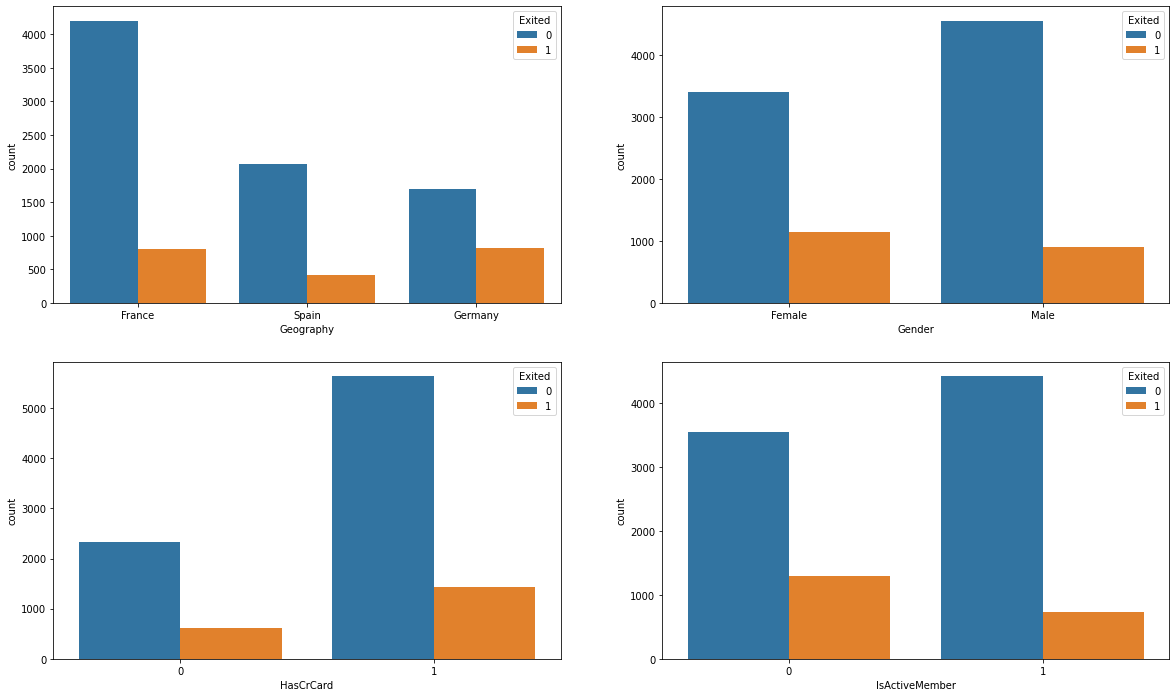

In [11]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited', data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited', data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited', data = df, ax=axarr[1][1])

We note the following:
*   Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
*   The proportion of female customers churning is also greater than that of male customers.
*   Interestingly, majority of the customers that churned are those with credit cards. given that majority of the customers have credit cards could prove this to be just a coincidence.
*   Unsurprisingly, the inactive members have a greater churn. Worryingly is that the overall proportion of inactive members is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definitely have a positive impact on the customer churn.






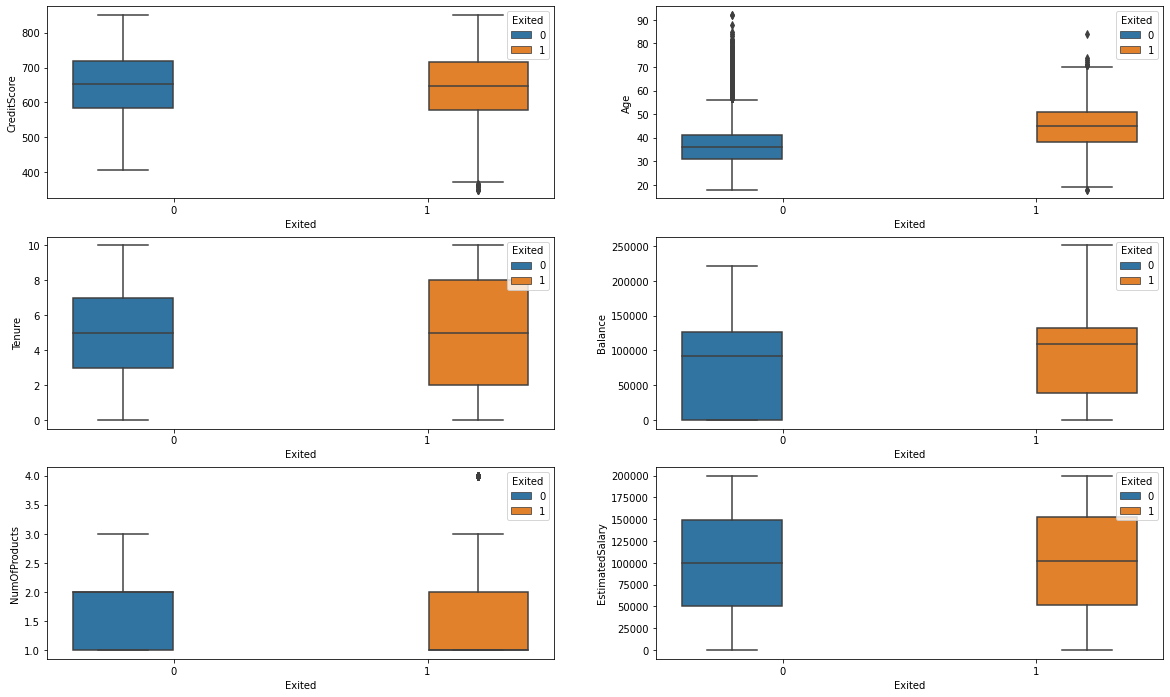

In [12]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore', x = 'Exited', hue = 'Exited', data = df, ax=axarr[0][0])
sns.boxplot(y='Age', x = 'Exited', hue = 'Exited', data = df, ax=axarr[0][1])
sns.boxplot(y='Tenure', x = 'Exited', hue = 'Exited', data = df, ax=axarr[1][0])
sns.boxplot(y='Balance', x = 'Exited', hue = 'Exited', data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x = 'Exited', hue = 'Exited', data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x = 'Exited', hue = 'Exited', data = df, ax=axarr[2][1])

We note the following:
*   There is no significant difference in the credit score distribution between retained and churned customers.
*   The older customers are churning at more than the younger ones alluding to a difference in service preferenc in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups.
*   With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
*   Worryingly, th ebank is losing customers with significant bank balances which is likely to hit their available capital for lending.
*   Neither the produc nor the salary has a significant effect on the likelihood to churn.



## Correlation Matrix

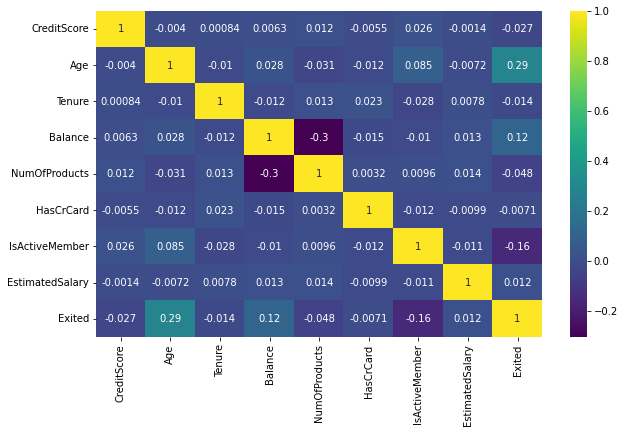

In [13]:
# Exited correlation matrix
cm = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

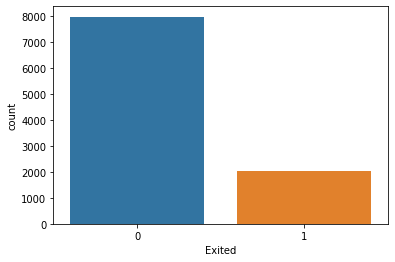

In [14]:
sns.countplot(x='Exited', data = df)

# 4. Feature engineering

We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets.

In [15]:
df_fe = df.copy()

In [16]:
# Balance Salary Ratio
df_fe['BalanceSalaryRatio'] = df_fe['Balance']/df_fe['EstimatedSalary']

# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_fe['TenureByAge'] = df_fe['Tenure']/(df_fe['Age'])

# Credit score given age to take into account credit behaviour visavis adult life
df_fe['CreditScoreGivenAge'] = df_fe['CreditScore']/(df_fe['Age'])

In [17]:
# Resulting Data Frame
df_fe.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


# 5. Data Preparation For Model Fitting

In [18]:
# One hot encode the categorical variables
from sklearn.preprocessing import OneHotEncoder
lst = ['Geography', 'Gender']
ohe = OneHotEncoder()
ohe.fit(df_fe[lst])
df_ohe_res = pd.DataFrame(ohe.transform(df_fe[lst]).toarray(),
                          columns = ohe.get_feature_names_out())
df_fe = pd.concat([df_fe, df_ohe_res], axis=1)
df_fe.drop(columns=lst, inplace=True)
df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442,0.0,0.0,1.0,1.0,0.0


In [19]:
# minMax scaling the continuous variables
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(df_fe) 
df_fe = pd.DataFrame(mm.transform(df_fe), columns=df_fe.columns) 

df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.000000,0.085714,0.235083,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.000070,0.043902,0.237252,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.000132,0.342857,0.168807,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.000000,0.046154,0.310859,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.000150,0.083721,0.354739,0.0,0.0,1.0,1.0,0.0


In [20]:
from sklearn.model_selection import train_test_split

# Split Train, test date
X = df_fe.drop(columns=['Exited']).copy()
y = df_fe['Exited'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

print(len(X_train))
print(len(X_test))

7500
2500


In [21]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
4901,0.646,0.554054,0.0,0.709683,0.333333,0.0,1.0,0.105271,0.000796,0.000000,0.155826,1.0,0.0,0.0,0.0,1.0
4375,1.000,0.310811,0.8,0.242651,0.000000,1.0,0.0,0.159086,0.000180,0.351220,0.377680,0.0,1.0,0.0,0.0,1.0
6698,0.750,0.175676,0.6,0.000000,0.000000,0.0,0.0,0.306604,0.000000,0.348387,0.440856,1.0,0.0,0.0,1.0,0.0
9805,0.588,0.202703,0.7,0.695786,0.000000,0.0,1.0,0.219679,0.000374,0.381818,0.348737,1.0,0.0,0.0,0.0,1.0
1101,0.706,0.148649,0.9,0.000000,0.333333,1.0,0.0,0.253364,0.000000,0.558621,0.461181,0.0,0.0,1.0,0.0,1.0


# 6. Model Fitting and Selection

For the model fitting, I will try out the following:
*   Logistic regression
*   KNN
*   Ensemble models


In [22]:
# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Fit Best Models

In [23]:
# Fit logistic regression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Fit KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# Fit Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

## Review Best Model Fit Accuracy

In [26]:
y_pred_log = log.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      2003
         1.0       0.58      0.21      0.31       497

    accuracy                           0.81      2500
   macro avg       0.70      0.59      0.60      2500
weighted avg       0.78      0.81      0.78      2500



In [27]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      2003
         1.0       0.56      0.30      0.39       497

    accuracy                           0.81      2500
   macro avg       0.70      0.62      0.64      2500
weighted avg       0.79      0.81      0.79      2500



In [28]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      2003
         1.0       0.79      0.48      0.60       497

    accuracy                           0.87      2500
   macro avg       0.84      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500



In [29]:
def get_auc_scores(y_actual, y_pred, y_proba):
  auc_score = roc_auc_score(y_actual, y_pred);
  fpr_df, tpr_df, _ = roc_curve(y_actual, y_proba);
  return (auc_score, fpr_df, tpr_df)

In [30]:
auc_log, fpr_log, tpr_log = get_auc_scores(y,
                                           log.predict(X),
                                           log.predict_proba(X)[:,1])
auc_knn, fpr_knn, tpr_knn = get_auc_scores(y,
                                           knn.predict(X),
                                           knn.predict_proba(X)[:,1])
auc_rf, fpr_rf, tpr_rf = get_auc_scores(y,
                                        rf.predict(X),
                                        rf.predict_proba(X)[:,1])

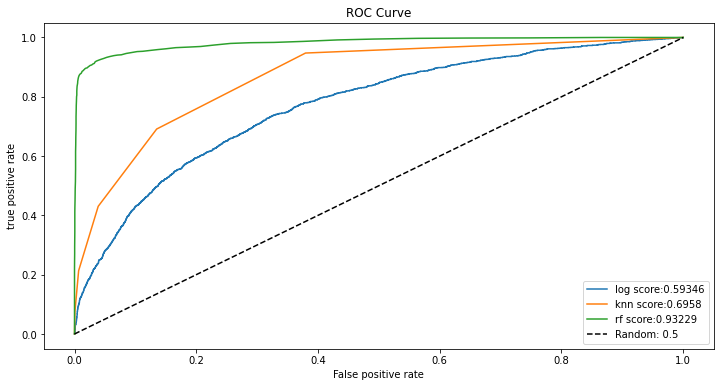

In [31]:
plt.figure(figsize = (12,6), linewidth=1)
plt.plot(fpr_log, tpr_log, label = 'log score:' + str(round(auc_log, 5)))
plt.plot(fpr_knn, tpr_knn, label = 'knn score:' + str(round(auc_knn, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'rf score:' + str(round(auc_rf, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

Metric Reference [Sensitivity,Specificity,F1](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)

## Resampling to handle imbalanced dataset

In [32]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [33]:
y_train.value_counts()

0.0    5960
1.0    1540
Name: Exited, dtype: int64

In [34]:
y_smote.value_counts()

1.0    5960
0.0    5960
Name: Exited, dtype: int64

In [35]:
# Fit Random Forest classifier
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier()

In [36]:
y_pred_smote = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      2003
         1.0       0.60      0.60      0.60       497

    accuracy                           0.84      2500
   macro avg       0.75      0.75      0.75      2500
weighted avg       0.84      0.84      0.84      2500



## Feature Importance

<BarContainer object of 16 artists>

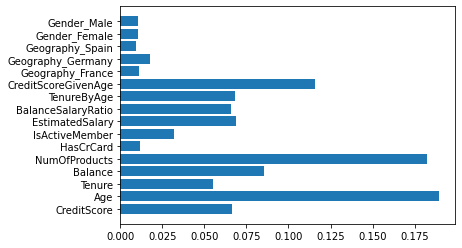

In [37]:
fi = rf_smote.feature_importances_
col = X_train.columns
plt.barh(col, fi)

In [38]:
df.groupby('Exited')['Age'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [39]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


**Homework**
Buatlah tiga model lain untuk memprediksi churn rate dari data set yang ada. Tiga model yang diharapkan adalah:
1.   Gradient Boosting Model
2.   SVM
3.   Tentukan Sendiri



# Homework

1.   Gradient Boosting Model
2.   SVM
3.   Decision Tree



In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Fit Best Models


In [41]:
# Fit Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [42]:
# Fit SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [43]:
# Fit Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## Review Best Model Fit Accuracy

In [44]:
# Gradient Boosting
y_pred_gbc = gbc.predict(X_test)
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2003
         1.0       0.77      0.47      0.59       497

    accuracy                           0.87      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



In [45]:
# SVM
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      2003
         1.0       0.81      0.23      0.35       497

    accuracy                           0.84      2500
   macro avg       0.82      0.61      0.63      2500
weighted avg       0.83      0.84      0.80      2500



In [46]:
# Decision Tree
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      2003
         1.0       0.47      0.48      0.47       497

    accuracy                           0.79      2500
   macro avg       0.67      0.67      0.67      2500
weighted avg       0.79      0.79      0.79      2500



In [47]:
def get_auc_scores(y_actual, y_pred, y_proba):
  auc_score = roc_auc_score(y_actual, y_pred);
  fpr_df, tpr_df, _ = roc_curve(y_actual, y_proba);
  return (auc_score, fpr_df, tpr_df)

In [48]:
auc_gbc, fpr_gbc, tpr_gbc = get_auc_scores(y,
                                           gbc.predict(X),
                                           gbc.predict_proba(X)[:,1])
auc_svm, fpr_svm, tpr_svm = get_auc_scores(y,
                                           svm.predict(X),
                                           svm.predict_proba(X)[:,1])
auc_dt, fpr_dt, tpr_dt = get_auc_scores(y,
                                        dt.predict(X),
                                        dt.predict_proba(X)[:,1])


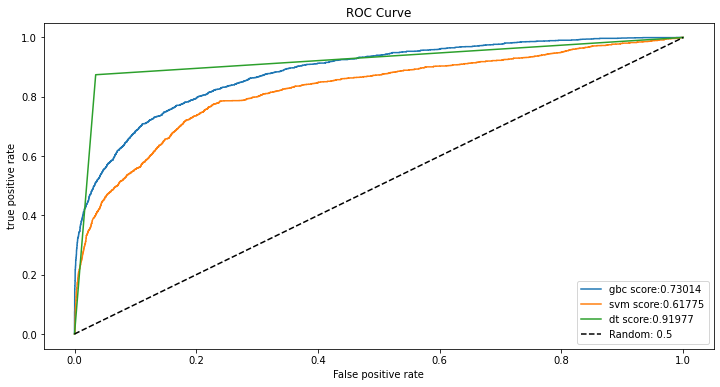

In [49]:
plt.figure(figsize = (12,6), linewidth=1)
plt.plot(fpr_gbc, tpr_gbc, label = 'gbc score:' + str(round(auc_gbc, 5)))
plt.plot(fpr_svm, tpr_svm, label = 'svm score:' + str(round(auc_svm, 5)))
plt.plot(fpr_dt, tpr_dt, label = 'dt score:' + str(round(auc_dt, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

## Resampling To Handle Imbalanced Dataset

In [50]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [51]:
y_train.value_counts()

0.0    5960
1.0    1540
Name: Exited, dtype: int64

In [52]:
y_smote.value_counts()

1.0    5960
0.0    5960
Name: Exited, dtype: int64

In [55]:
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_smote, y_smote)

DecisionTreeClassifier()

In [58]:
y_pred_smote = dt_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85      2003
         1.0       0.44      0.55      0.49       497

    accuracy                           0.77      2500
   macro avg       0.66      0.69      0.67      2500
weighted avg       0.79      0.77      0.78      2500



## Feature Importance

<BarContainer object of 16 artists>

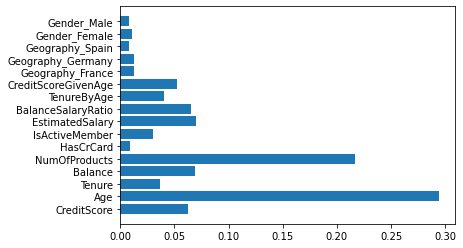

In [60]:
fi = dt_smote.feature_importances_
col = X_train.columns
plt.barh(col, fi)

In [61]:
df.groupby('Exited')['Age'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [62]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60
